In [39]:
import pandas as pd
import numpy as np
from surface_variation import PointCloudAnalysis
import matplotlib.pyplot as plt
import os
import open3d as o3d


In [2]:
file = "../../kitti_with_person/08/001859.csv"

In [5]:
df = pd.read_csv(file)

In [6]:
df

,X,Y,Z,Emission,SemanticID,InstanceID
0,32.708355,0.158311,1.315071,0.57,81.0,0.0
1,32.437943,0.257878,1.306115,0.99,81.0,0.0
2,32.406734,0.308657,1.305137,0.99,81.0,0.0
3,32.393330,0.409220,1.305181,0.99,81.0,0.0
4,32.509922,0.512769,1.309225,0.99,81.0,0.0
...,...,...,...,...,...,...
121934,3.791759,-1.429025,-1.754073,0.34,40.0,0.0
121935,3.782294,-1.412093,-1.747058,0.36,40.0,0.0
121936,3.797075,-1.411093,-1.753055,0.39,40.0,0.0
121937,3.814652,-1.405112,-1.759047,0.34,40.0,0.0


In [14]:
available_labels = list(set(df["SemanticID"]))
available_labels

[0.0,
 1.0,
 259.0,
 10.0,
 11.0,
 30.0,
 40.0,
 44.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 70.0,
 71.0,
 72.0,
 80.0,
 81.0,
 99.0,
 252.0,
 253.0,
 254.0]

In [10]:
labels = { 
  0 : "unlabeled",
  1 : "outlier",
  10: "car",
  11: "bicycle",
  13: "bus",
  15: "motorcycle",
  16: "on-rails",
  18: "truck",
  20: "other-vehicle",
  30: "person",
  31: "bicyclist",
  32: "motorcyclist",
  40: "road",
  44: "parking",
  48: "sidewalk",
  49: "other-ground",
  50: "building",
  51: "fence",
  52: "other-structure",
  60: "lane-marking",
  70: "vegetation",
  71: "trunk",
  72: "terrain",
  80: "pole",
  81: "traffic-sign",
  99: "other-object",
  252: "moving-car",
  253: "moving-bicyclist",
  254: "moving-person",
  255: "moving-motorcyclist",
  256: "moving-on-rails",
  257: "moving-bus",
  258: "moving-truck",
  259: "moving-other-vehicle",
}

In [11]:
labels

{0: 'unlabeled',
 1: 'outlier',
 10: 'car',
 11: 'bicycle',
 13: 'bus',
 15: 'motorcycle',
 16: 'on-rails',
 18: 'truck',
 20: 'other-vehicle',
 30: 'person',
 31: 'bicyclist',
 32: 'motorcyclist',
 40: 'road',
 44: 'parking',
 48: 'sidewalk',
 49: 'other-ground',
 50: 'building',
 51: 'fence',
 52: 'other-structure',
 60: 'lane-marking',
 70: 'vegetation',
 71: 'trunk',
 72: 'terrain',
 80: 'pole',
 81: 'traffic-sign',
 99: 'other-object',
 252: 'moving-car',
 253: 'moving-bicyclist',
 254: 'moving-person',
 255: 'moving-motorcyclist',
 256: 'moving-on-rails',
 257: 'moving-bus',
 258: 'moving-truck',
 259: 'moving-other-vehicle'}

In [17]:
df[df["SemanticID"] == 99]["SemanticID"].count()

6326

In [18]:
labels_count_dict = {}
for label in available_labels:
    count = df[df["SemanticID"] == label]["SemanticID"].count()
    labels_count_dict[label] = count

print(labels_count_dict)

{0.0: 3911, 1.0: 22, 259.0: 35, 10.0: 1769, 11.0: 1062, 30.0: 1234, 40.0: 31903, 44.0: 6326, 48.0: 32905, 49.0: 1, 50.0: 9193, 51.0: 1537, 52.0: 337, 70.0: 11863, 71.0: 2979, 72.0: 8379, 80.0: 480, 81.0: 900, 99.0: 6326, 252.0: 46, 253.0: 146, 254.0: 585}


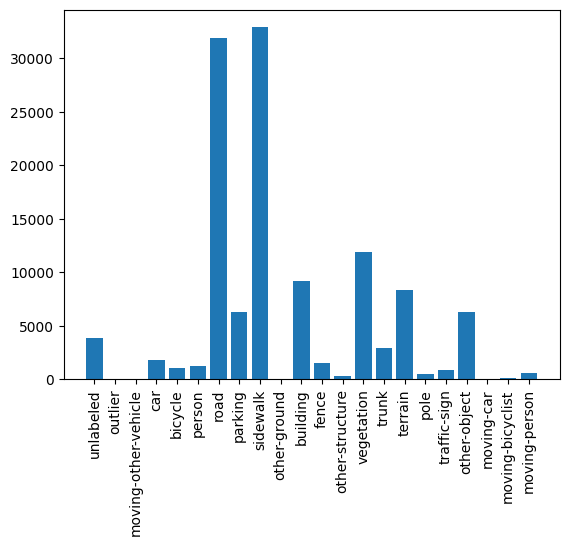

In [24]:
x = [labels[key] for key in labels_count_dict.keys()]
y = labels_count_dict.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

## Looping a folder of semantic kitti and visualising the distribution

In [26]:
folder = "../../kitti_with_person/09/"

files = os.listdir(folder)


In [27]:
files

['001160.csv',
 '000641.csv',
 '001154.csv',
 '000644.csv',
 '000639.csv',
 '000642.csv',
 '001152.csv',
 '001159.csv',
 '001157.csv',
 '001153.csv',
 '000640.csv',
 '001163.csv',
 '001162.csv',
 '001156.csv',
 '001158.csv',
 '000646.csv',
 '000643.csv',
 '001161.csv',
 '000645.csv',
 '001155.csv']

In [29]:
empty_dict_labels_count = {i:0 for i in labels.keys()}
empty_dict_labels_count

{0: 0,
 1: 0,
 10: 0,
 11: 0,
 13: 0,
 15: 0,
 16: 0,
 18: 0,
 20: 0,
 30: 0,
 31: 0,
 32: 0,
 40: 0,
 44: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 60: 0,
 70: 0,
 71: 0,
 72: 0,
 80: 0,
 81: 0,
 99: 0,
 252: 0,
 253: 0,
 254: 0,
 255: 0,
 256: 0,
 257: 0,
 258: 0,
 259: 0}

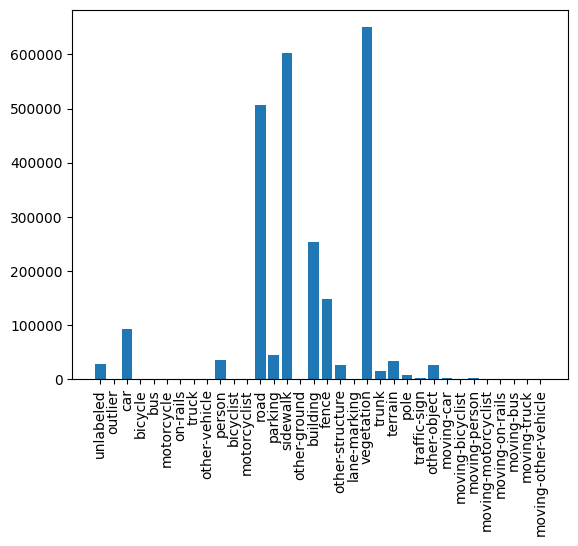

In [35]:
folder = "../../kitti_with_person/09/"

files = os.listdir(folder)



new_dict_labels_count = {i:0 for i in labels.keys()}
file_wise_content = {}
for file in files:
    df = pd.read_csv(folder+file)
    file_wise_content[file] = {}
    for label in available_labels:
        count = df[df["SemanticID"] == label]["SemanticID"].count()
        file_wise_content[file][int(label)] = count
        new_dict_labels_count[int(label)] = new_dict_labels_count[int(label)] + count

    downtown_points = sum([v for (k, v) in file_wise_content[file].items() if k not in [0, 1, 70, 71, 72, 40, 48, 99]]) 
    vegetation_points = sum([v for (k, v) in file_wise_content[file].items() if k in [70, 71, 72]]) # Vegetation, Trunk, Train
    
    file_wise_content[file]["downtown_points"] = downtown_points
    file_wise_content[file]["vegetation_points"] = vegetation_points



x = [labels[key] for key in new_dict_labels_count.keys()]
y = new_dict_labels_count.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()   

In [ ]:
folder = "../../kitti_with_person/09/"

files = os.listdir(folder)



new_dict_labels_count = {i:0 for i in labels.keys()}
file_wise_content = {}
for file in files:
    df = pd.read_csv(folder+file)
    file_wise_content[file] = {}
    for label in available_labels:
        count = df[df["SemanticID"] == label]["SemanticID"].count()
        file_wise_content[file][int(label)] = count
        new_dict_labels_count[int(label)] = new_dict_labels_count[int(label)] + count

    downtown_points = sum([v for (k, v) in file_wise_content[file].items() if k not in [0, 1, 70, 71, 72, 99]]) 
    vegetation_points = sum([v for (k, v) in file_wise_content[file].items() if k in [70, 71, 72]]) # Vegetation, Trunk, Train
    
    file_wise_content[file]["downtown_points"] = downtown_points
    file_wise_content[file]["vegetation_points"] = vegetation_points


x = [labels[key] for key in new_dict_labels_count.keys()]
y = new_dict_labels_count.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()   

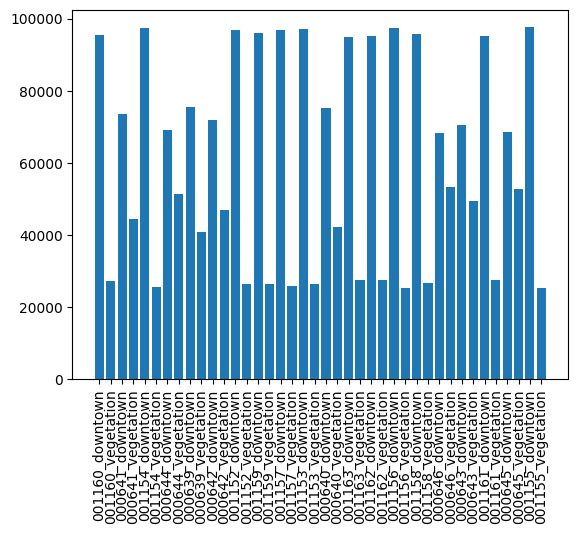

In [38]:
folder = "../../kitti_with_person/09/"

files = os.listdir(folder)



new_dict_labels_count = {i:0 for i in labels.keys()}
file_wise_content = {}
for file in files:
    df = pd.read_csv(folder+file)
    file_wise_content[file] = {}
    for label in available_labels:
        count = df[df["SemanticID"] == label]["SemanticID"].count()
        file_wise_content[file][int(label)] = count

    downtown_points = sum([v for (k, v) in file_wise_content[file].items() if k not in [0, 1, 70, 71, 72, 99]]) # Remove outliers, vegetations, etc
    vegetation_points = sum([v for (k, v) in file_wise_content[file].items() if k in [70, 71, 72]]) # Vegetation, Trunk, Terrain
    file_wise_content[file]["downtown_points"] = downtown_points
    file_wise_content[file]["vegetation_points"] = vegetation_points


xy_dict = {}

for file, value_dict in file_wise_content.items():
    file_name = file.split(".")[0]
    xy_dict[file_name+"_downtown"] = value_dict["downtown_points"]
    xy_dict[file_name+"_vegetation"] = value_dict["vegetation_points"]


x = xy_dict.keys()
y = xy_dict.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show() 

In [53]:
folder = "../../kitti_with_person/09/"

files = os.listdir(folder)

search_tree = o3d.geometry.KDTreeSearchParamHybrid(radius=0.3, max_nn=6)
file_wise_features = {}

labels_not_in_downtown = [0, 1, 70, 71, 72, 99]
labels_in_vegetation = [70, 71, 72]

for file in files:
    df = pd.read_csv(folder+file)
    
    df_downtown = df[~df["SemanticID"].isin(labels_not_in_downtown)]
    xyz_downtown = df_downtown.iloc[:, :3].to_numpy()
    pcd_obj_downtown = PointCloudAnalysis(xyz_downtown, search_tree=search_tree)
    df_downtown["sv_downtown"] = pcd_obj_downtown.get_normalized_surface_variation()

    df_vegetation = df[df["SemanticID"].isin(labels_in_vegetation)]
    xyz_vegetation = df_vegetation.iloc[:, :3].to_numpy()
    pcd_obj_vegetation = PointCloudAnalysis(xyz_vegetation, search_tree=search_tree)
    df_vegetation["sv_vegetation"] = pcd_obj_vegetation.get_normalized_surface_variation()

    file_wise_features[file] = {"d": df_downtown["sv_downtown"].count(), "d_sv": df_downtown["sv_downtown"].sum()/ df_downtown["sv_downtown"].count(),
                               "v": df_vegetation["sv_vegetation"].count(), "v_sv": df_vegetation["sv_vegetation"].sum()/df_vegetation["sv_vegetation"].count()}
    


/tmp/ipykernel_5795/653465123.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_downtown["sv_downtown"] = pcd_obj_downtown.get_normalized_surface_variation()
/tmp/ipykernel_5795/653465123.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vegetation["sv_vegetation"] = pcd_obj_vegetation.get_normalized_surface_variation()


In [54]:
file_wise_features

{'001160.csv': {'d': 95550,
  'd_sv': 0.03020993652963763,
  'v': 27173,
  'v_sv': 0.1835556902824944},
 '000641.csv': {'d': 76797,
  'd_sv': 0.037183651086415116,
  'v': 44479,
  'v_sv': 0.17668277583146133},
 '001154.csv': {'d': 97504,
  'd_sv': 0.030383940465054424,
  'v': 25748,
  'v_sv': 0.17973242516519697},
 '000644.csv': {'d': 71248,
  'd_sv': 0.030362237113208474,
  'v': 51448,
  'v_sv': 0.1764762709442847},
 '000639.csv': {'d': 80312,
  'd_sv': 0.03799092486903359,
  'v': 40922,
  'v_sv': 0.17860468068918464},
 '000642.csv': {'d': 74712,
  'd_sv': 0.03366262713402414,
  'v': 46907,
  'v_sv': 0.17922347113485104},
 '001152.csv': {'d': 96967,
  'd_sv': 0.03157173473067065,
  'v': 26403,
  'v_sv': 0.17984608318893575},
 '001159.csv': {'d': 95935,
  'd_sv': 0.03147820210395433,
  'v': 26510,
  'v_sv': 0.17715896544519594},
 '001157.csv': {'d': 96772,
  'd_sv': 0.03222499709234161,
  'v': 25811,
  'v_sv': 0.1801527893777669},
 '001153.csv': {'d': 97206,
  'd_sv': 0.030675915078130

In [57]:
x = []
y = []


for key, value_dict in file_wise_features.items():
    x.append(value_dict["d_sv"])
    y.append(value_dict["d"])
    x.append(value_dict["v_sv"])
    y.append(value_dict["v"])


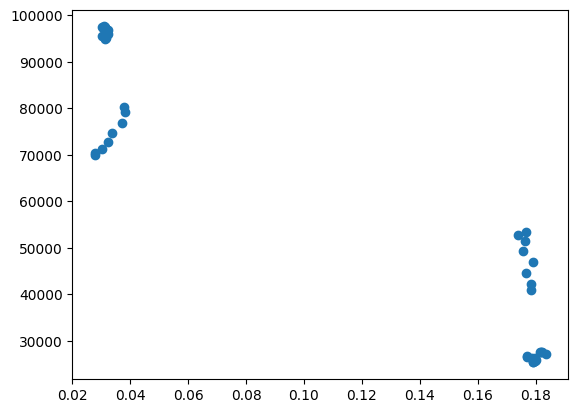

In [61]:
plt.scatter(x, y)
# plt.xticks(rotation=90)
plt.show() 

In [70]:
root_folder = "../../kitti_with_person/"

folders = [root_folder+i+"/" for i in os.listdir(root_folder)]
# print(folders)
files_list = []

for folder in folders:
    files_list += [folder+i for i in os.listdir(folder)]

print(files_list)

print(len(files_list))

['../../kitti_with_person/08/001863.csv', '../../kitti_with_person/08/001858.csv', '../../kitti_with_person/08/001864.csv', '../../kitti_with_person/08/001859.csv', '../../kitti_with_person/08/001861.csv', '../../kitti_with_person/08/001866.csv', '../../kitti_with_person/08/001453.csv', '../../kitti_with_person/08/001451.csv', '../../kitti_with_person/08/001865.csv', '../../kitti_with_person/08/001867.csv', '../../kitti_with_person/08/001856.csv', '../../kitti_with_person/08/001449.csv', '../../kitti_with_person/08/001855.csv', '../../kitti_with_person/08/001452.csv', '../../kitti_with_person/08/001862.csv', '../../kitti_with_person/08/001857.csv', '../../kitti_with_person/08/001854.csv', '../../kitti_with_person/08/001450.csv', '../../kitti_with_person/08/001454.csv', '../../kitti_with_person/08/001860.csv', '../../kitti_with_person/07/001084.csv', '../../kitti_with_person/07/001097.csv', '../../kitti_with_person/07/001099.csv', '../../kitti_with_person/07/001094.csv', '../../kitti_wi

/tmp/ipykernel_5795/748270250.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_downtown["sv_downtown"] = pcd_obj_downtown.get_normalized_surface_variation()
/tmp/ipykernel_5795/748270250.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vegetation["sv_vegetation"] = pcd_obj_vegetation.get_normalized_surface_variation()


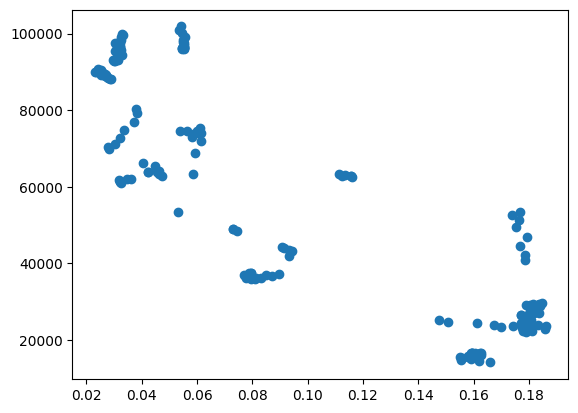

In [71]:
search_tree = o3d.geometry.KDTreeSearchParamHybrid(radius=0.3, max_nn=6)
file_wise_features = {}

labels_not_in_downtown = [0, 1, 70, 71, 72, 99]
labels_in_vegetation = [70, 71, 72]

for file in files_list:
    df = pd.read_csv(folder+file)
    
    df_downtown = df[~df["SemanticID"].isin(labels_not_in_downtown)]
    xyz_downtown = df_downtown.iloc[:, :3].to_numpy()
    pcd_obj_downtown = PointCloudAnalysis(xyz_downtown, search_tree=search_tree)
    df_downtown["sv_downtown"] = pcd_obj_downtown.get_normalized_surface_variation()

    df_vegetation = df[df["SemanticID"].isin(labels_in_vegetation)]
    xyz_vegetation = df_vegetation.iloc[:, :3].to_numpy()
    pcd_obj_vegetation = PointCloudAnalysis(xyz_vegetation, search_tree=search_tree)
    df_vegetation["sv_vegetation"] = pcd_obj_vegetation.get_normalized_surface_variation()

    file_wise_features[file] = {"d": df_downtown["sv_downtown"].count(), "d_sv": df_downtown["sv_downtown"].sum()/ df_downtown["sv_downtown"].count(),
                               "v": df_vegetation["sv_vegetation"].count(), "v_sv": df_vegetation["sv_vegetation"].sum()/df_vegetation["sv_vegetation"].count()}
    

x = []
y = []


for key, value_dict in file_wise_features.items():
    x.append(value_dict["d_sv"])
    y.append(value_dict["d"])
    x.append(value_dict["v_sv"])
    y.append(value_dict["v"])

plt.scatter(x, y)
# plt.xticks(rotation=90)
plt.show()



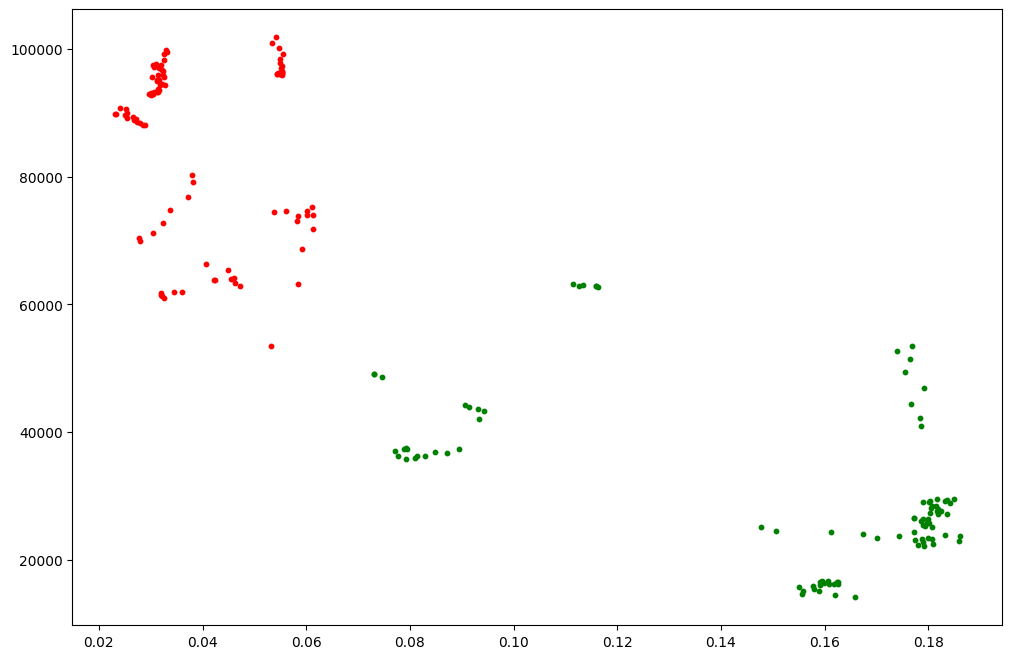

In [76]:
# d refers to downtown 
# v refers to vegetation

x_d = []
y_d = []

x_v = []
y_v = []


for key, value_dict in file_wise_features.items():
    x_d.append(value_dict["d_sv"])
    y_d.append(value_dict["d"])
    x_v.append(value_dict["v_sv"])
    y_v.append(value_dict["v"])
plt.figure(figsize=(12, 8))
plt.scatter(x_d, y_d, color="red", s=10)
plt.scatter(x_v, y_v, color="green", s = 10)
# plt.xticks(rotation=90)
plt.show()

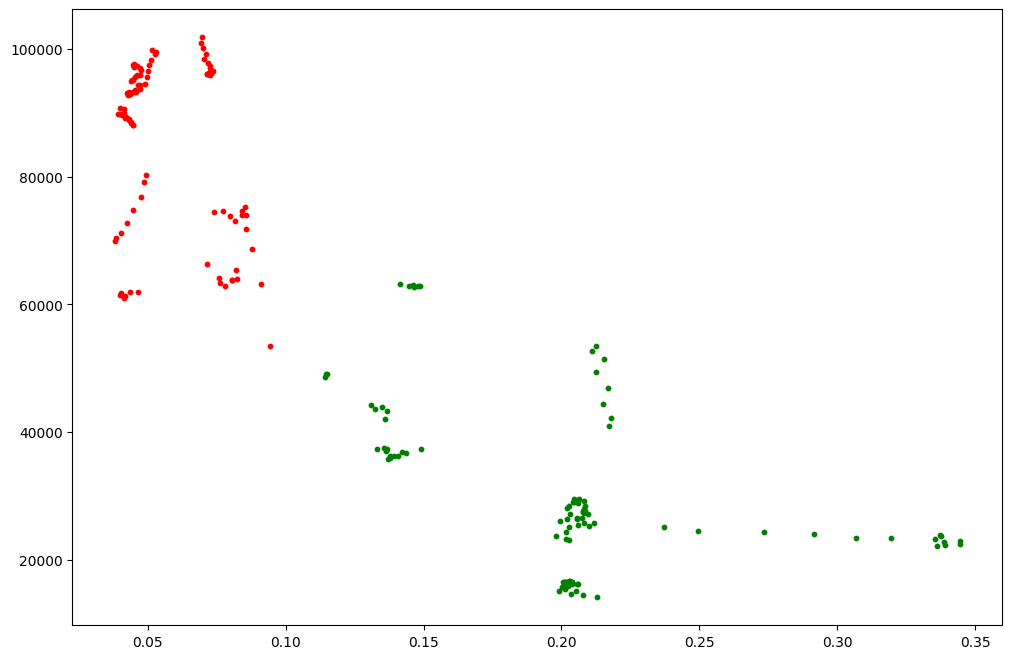

In [80]:
search_tree = o3d.geometry.KDTreeSearchParamHybrid(radius=0.2, max_nn=6)
file_wise_features = {}

labels_not_in_downtown = [0, 1, 70, 71, 72, 99]
labels_in_vegetation = [70, 71, 72]

for file in files_list:
    df = pd.read_csv(folder+file)
    pcd_obj = PointCloudAnalysis(df.iloc[:, :3].to_numpy(), search_tree=search_tree)
    df["sv"] = pcd_obj.get_normalized_surface_variation()
    df_downtown = df[~df["SemanticID"].isin(labels_not_in_downtown)]
    df_vegetation = df[df["SemanticID"].isin(labels_in_vegetation)]
    

    file_wise_features[file] = {"d": df_downtown["sv"].count(), "d_sv": df_downtown["sv"].sum()/ df_downtown["sv"].count(),
                               "v": df_vegetation["sv"].count(), "v_sv": df_vegetation["sv"].sum()/df_vegetation["sv"].count()}
    


# d refers to downtown 
# v refers to vegetation

x_d = []
y_d = []

x_v = []
y_v = []


for key, value_dict in file_wise_features.items():
    x_d.append(value_dict["d_sv"])
    y_d.append(value_dict["d"])
    x_v.append(value_dict["v_sv"])
    y_v.append(value_dict["v"])
plt.figure(figsize=(12, 8))
plt.scatter(x_d, y_d, color="red", s=10)
plt.scatter(x_v, y_v, color="green", s = 10)
# plt.xticks(rotation=90)
plt.show()



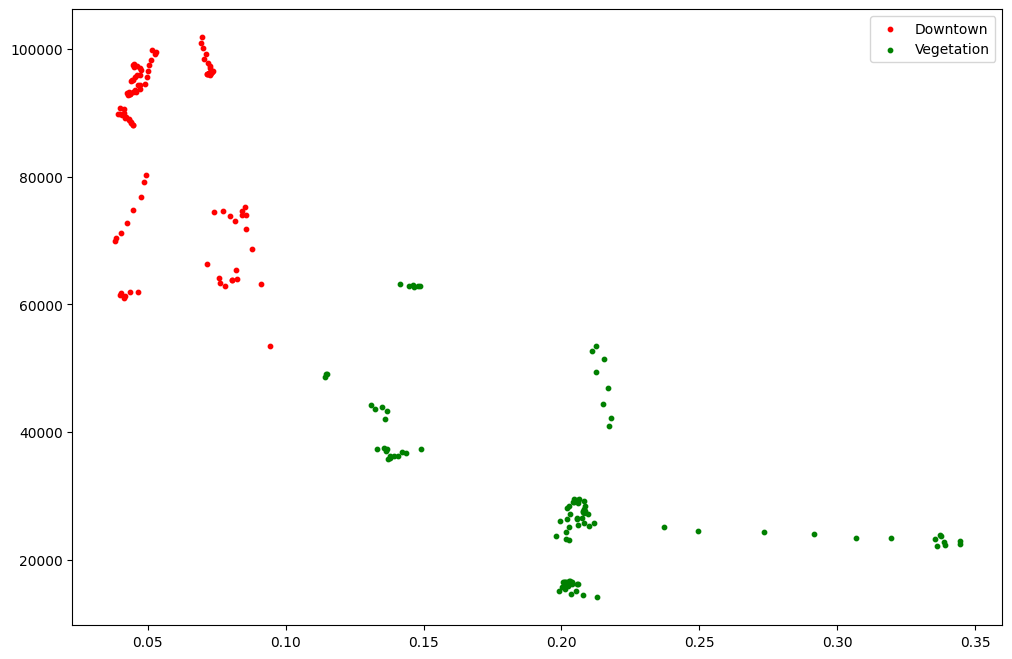

In [82]:
plt.figure(figsize=(12, 8))
plt.scatter(x_d, y_d, color="red", s=10, label="Downtown")
plt.scatter(x_v, y_v, color="green", s = 10, label="Vegetation")
# plt.xticks(rotation=90)
plt.legend()
plt.show()

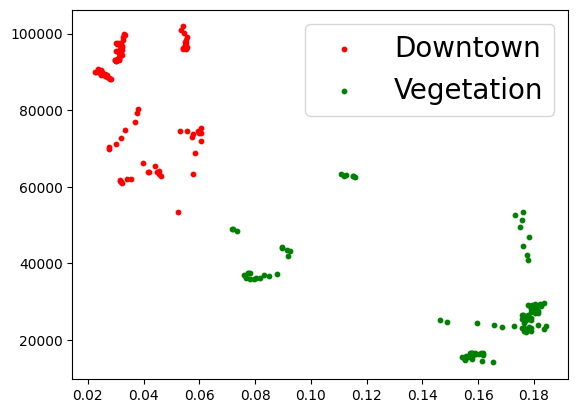

In [83]:
search_tree = o3d.geometry.KDTreeSearchParamHybrid(radius=0.3, max_nn=6)
file_wise_features = {}

labels_not_in_downtown = [0, 1, 70, 71, 72, 99]
labels_in_vegetation = [70, 71, 72]

for file in files_list:
    df = pd.read_csv(folder+file)
    pcd_obj = PointCloudAnalysis(df.iloc[:, :3].to_numpy(), search_tree=search_tree)
    df["sv"] = pcd_obj.get_normalized_surface_variation()
    df_downtown = df[~df["SemanticID"].isin(labels_not_in_downtown)]
    df_vegetation = df[df["SemanticID"].isin(labels_in_vegetation)]
    

    file_wise_features[file] = {"d": df_downtown["sv"].count(), "d_sv": df_downtown["sv"].sum()/ df_downtown["sv"].count(),
                               "v": df_vegetation["sv"].count(), "v_sv": df_vegetation["sv"].sum()/df_vegetation["sv"].count()}
    


# d refers to downtown 
# v refers to vegetation

x_d = []
y_d = []

x_v = []
y_v = []


for key, value_dict in file_wise_features.items():
    x_d.append(value_dict["d_sv"])
    y_d.append(value_dict["d"])
    x_v.append(value_dict["v_sv"])
    y_v.append(value_dict["v"])

plt.figure(figsize=(14, 10))
plt.scatter(x_d, y_d, color="red", s=10, label="Downtown")
plt.scatter(x_v, y_v, color="green", s = 10, label="Vegetation")
# plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.show()



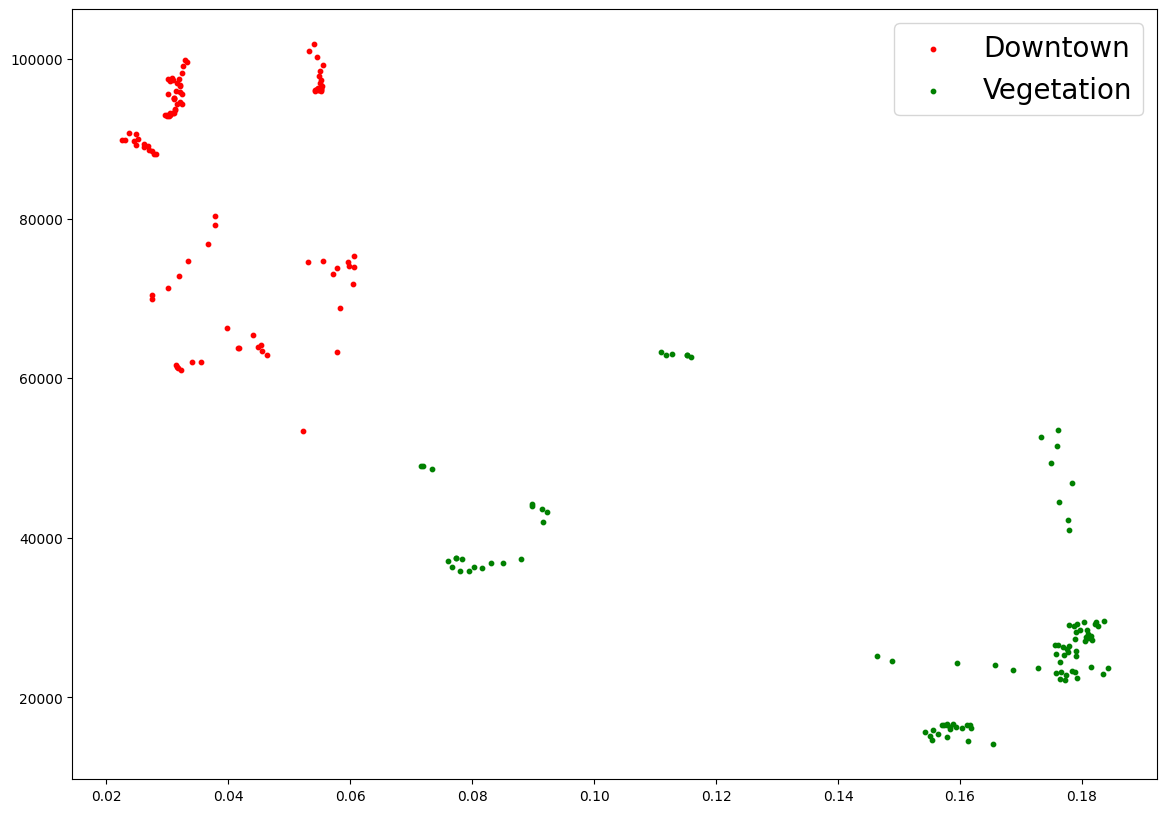

In [84]:

plt.figure(figsize=(14, 10))
plt.scatter(x_d, y_d, color="red", s=10, label="Downtown")
plt.scatter(x_v, y_v, color="green", s = 10, label="Vegetation")
# plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.show()


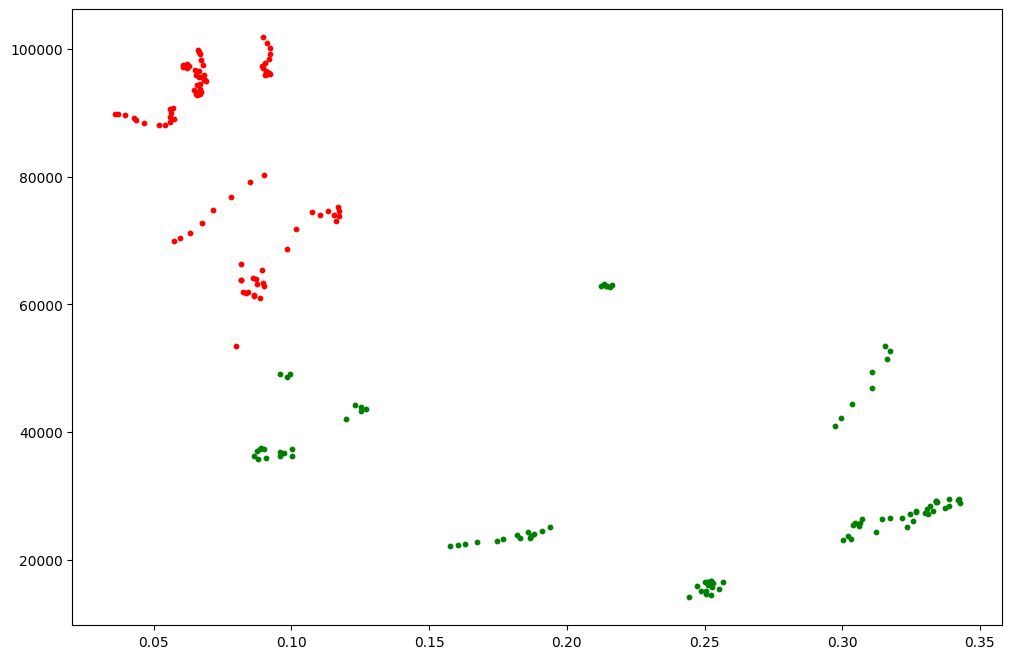

In [78]:
search_tree = o3d.geometry.KDTreeSearchParamHybrid(radius=1, max_nn=20)
file_wise_features = {}

labels_not_in_downtown = [0, 1, 70, 71, 72, 99]
labels_in_vegetation = [70, 71, 72]

for file in files_list:
    df = pd.read_csv(folder+file)
    pcd_obj = PointCloudAnalysis(df.iloc[:, :3].to_numpy(), search_tree=search_tree)
    df["sv"] = pcd_obj.get_normalized_surface_variation()
    df_downtown = df[~df["SemanticID"].isin(labels_not_in_downtown)]
    df_vegetation = df[df["SemanticID"].isin(labels_in_vegetation)]
    

    file_wise_features[file] = {"d": df_downtown["sv"].count(), "d_sv": df_downtown["sv"].sum()/ df_downtown["sv"].count(),
                               "v": df_vegetation["sv"].count(), "v_sv": df_vegetation["sv"].sum()/df_vegetation["sv"].count()}
    


# d refers to downtown 
# v refers to vegetation

x_d = []
y_d = []

x_v = []
y_v = []


for key, value_dict in file_wise_features.items():
    x_d.append(value_dict["d_sv"])
    y_d.append(value_dict["d"])
    x_v.append(value_dict["v_sv"])
    y_v.append(value_dict["v"])
plt.figure(figsize=(12, 8))
plt.scatter(x_d, y_d, color="red", s=10)
plt.scatter(x_v, y_v, color="green", s = 10)
# plt.xticks(rotation=90)
plt.show()



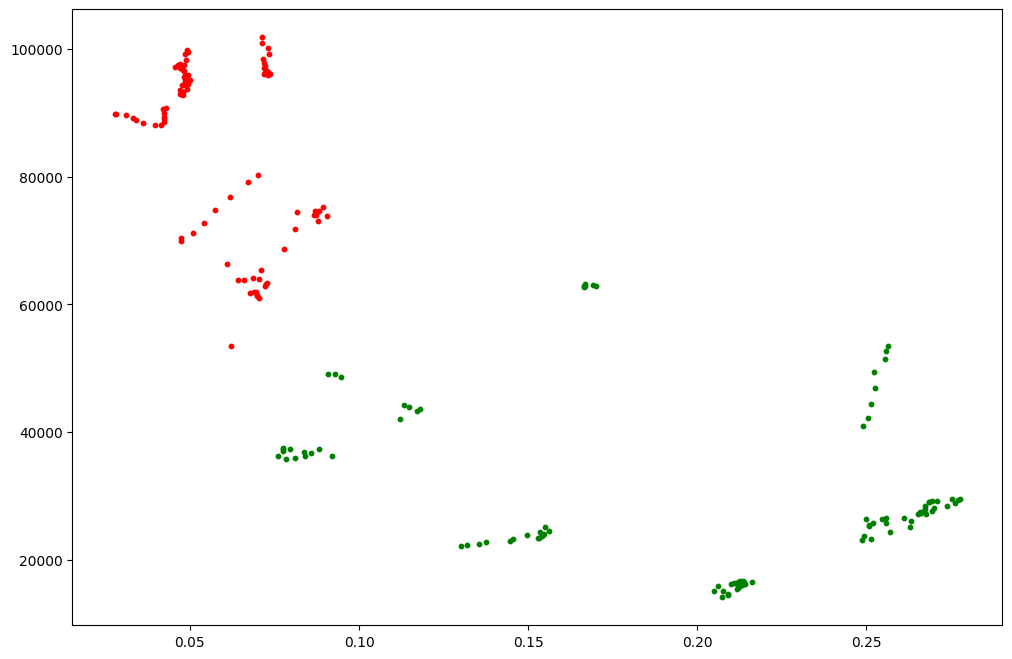

In [79]:
search_tree = o3d.geometry.KDTreeSearchParamHybrid(radius=1, max_nn=10)
file_wise_features = {}

labels_not_in_downtown = [0, 1, 70, 71, 72, 99]
labels_in_vegetation = [70, 71, 72]

for file in files_list:
    df = pd.read_csv(folder+file)
    pcd_obj = PointCloudAnalysis(df.iloc[:, :3].to_numpy(), search_tree=search_tree)
    df["sv"] = pcd_obj.get_normalized_surface_variation()
    df_downtown = df[~df["SemanticID"].isin(labels_not_in_downtown)]
    df_vegetation = df[df["SemanticID"].isin(labels_in_vegetation)]
    

    file_wise_features[file] = {"d": df_downtown["sv"].count(), "d_sv": df_downtown["sv"].sum()/ df_downtown["sv"].count(),
                               "v": df_vegetation["sv"].count(), "v_sv": df_vegetation["sv"].sum()/df_vegetation["sv"].count()}
    


# d refers to downtown 
# v refers to vegetation

x_d = []
y_d = []

x_v = []
y_v = []


for key, value_dict in file_wise_features.items():
    x_d.append(value_dict["d_sv"])
    y_d.append(value_dict["d"])
    x_v.append(value_dict["v_sv"])
    y_v.append(value_dict["v"])
plt.figure(figsize=(12, 8))
plt.scatter(x_d, y_d, color="red", s=10)
plt.scatter(x_v, y_v, color="green", s = 10)
# plt.xticks(rotation=90)
plt.show()



In [ ]:
https://github.com/PRBonn/semantic-kitti-api/blob/master/config/semantic-kitti-all.yaml

# # content as a ratio with the total number of points

In [86]:
content = {
     0: 0.018889854628292943,
  1: 0.0002937197336781505,
  10: 0.040818519255974316,
  11: 0.00016609538710764618,
  13: 2.7879693665067774e-05,
  15: 0.00039838616015114444,
  16: 0.0,
  18: 0.0020633612104619787,
  20: 0.0016218197275284021,
  30: 0.00017698551338515307,
  31: 1.1065903904919655e-08,
  32: 5.532951952459828e-09,
  40: 0.1987493871255525,
  44: 0.014717169549888214,
  48: 0.14392298360372,
  49: 0.0039048553037472045,
  50: 0.1326861944777486,
  51: 0.0723592229456223,
  52: 0.002395131480328884,
  60: 4.7084144280367186e-05,
  70: 0.26681502148037506,
  71: 0.006035012012626033,
  72: 0.07814222006271769,
  80: 0.002855498193863172,
  81: 0.0006155958086189918,
  99: 0.009923127583046915,
  252: 0.001789309418528068,
  253: 0.00012709999297008662,
  254: 0.00016059776092534436,
  255: 3.745553104802113e-05,
  256: 0.0,
  257: 0.00011351574470342043,
  258: 0.00010157861367183268,
  259: 4.3840131989471124e-05,
    
}

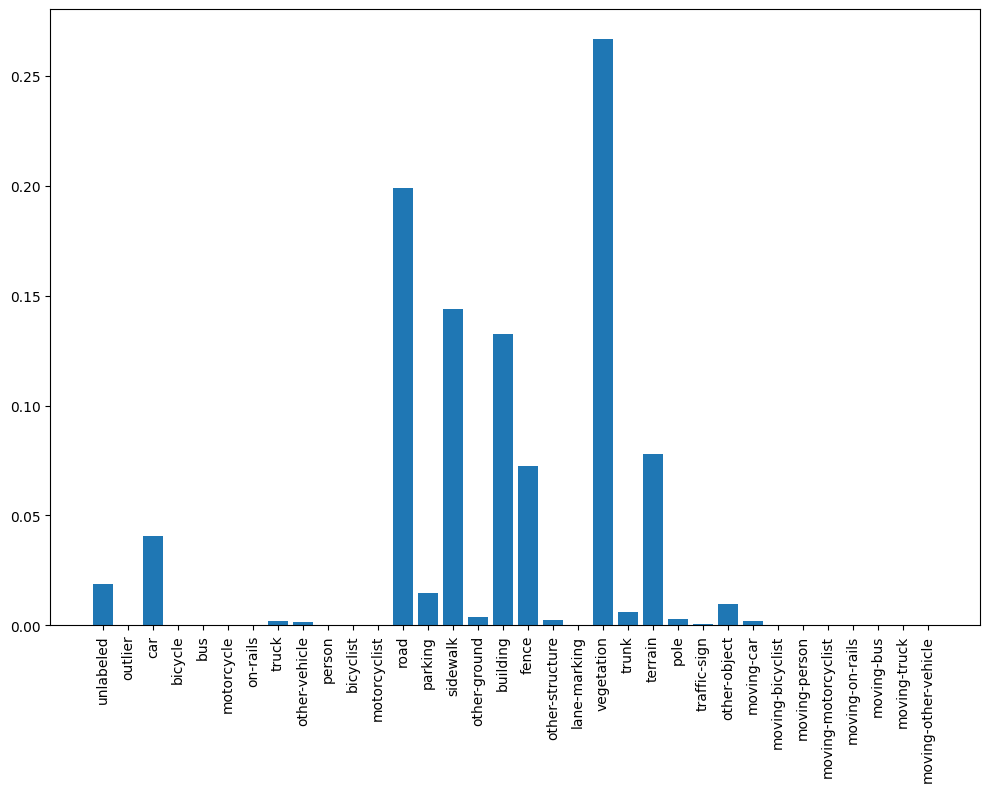

In [91]:
plt.figure(figsize=(12, 8))
x = [labels[key] for key in content.keys()]
y = content.values()
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()


In [92]:
sum(content.values())

0.9999985388750728